In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
from torchsummary import summary
import matplotlib.pyplot as plt

# Define the VGG19 Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg19_bn = models.vgg19_bn(pretrained=False, num_classes=10)
vgg19_bn = vgg19_bn.to(device)

# Display model summary
summary(vgg19_bn, (3, 32, 32))

C:\Users\ALHC\anaconda3\envs\cvdl\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\ALHC\anaconda3\envs\cvdl\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]          36,928
       BatchNorm2d-5           [-1, 64, 32, 32]             128
              ReLU-6           [-1, 64, 32, 32]               0
         MaxPool2d-7           [-1, 64, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]          73,856
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,584
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
        MaxPool2d-14            [-1, 12

In [2]:
# from google.colab import drive
import os

# Mount Google Drive
# drive.mount('/content/drive')

In [3]:
# Load CIFAR-10 Dataset
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(30),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
])

transform_val = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
])

train_dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=transform_train)
val_dataset = datasets.CIFAR10(root="./data", train=False, download=True, transform=transform_val)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified


In [4]:
# # Define Loss Function and Optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(vgg19_bn.parameters(), lr=0.0005)

# # Training Parameters
# num_epochs = 1
# best_val_accuracy = 0.0
# train_loss_history, val_loss_history = [], []
# train_acc_history, val_acc_history = [], []

# # Training Loop
# for epoch in range(num_epochs):
#     vgg19_bn.train()
#     train_loss, correct_train = 0.0, 0
#     total_train = 0
#     batch_idx = 0

#     for images, labels in train_loader:
#         images, labels = images.to(device), labels.to(device)
#         optimizer.zero_grad()
#         outputs = vgg19_bn(images)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         train_loss += loss.item() * images.size(0)
#         _, predicted = outputs.max(1)
#         correct_train += (predicted == labels).sum().item()
#         total_train += labels.size(0)

#         batch_idx += 1
#         # Print batch loss and accuracy
#         batch_accuracy = (predicted == labels).sum().item() / labels.size(0)
#         print(f"Batch {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}, Accuracy: {batch_accuracy:.4f}")

#     train_loss /= total_train
#     train_accuracy = 100 * correct_train / total_train
#     train_loss_history.append(train_loss)
#     train_acc_history.append(train_accuracy)

#     # Validation
#     vgg19_bn.eval()
#     val_loss, correct_val = 0.0, 0
#     total_val = 0
#     batch_idx = 0

#     with torch.no_grad():
#         for images, labels in val_loader:
#             images, labels = images.to(device), labels.to(device)
#             outputs = vgg19_bn(images)
#             loss = criterion(outputs, labels)

#             val_loss += loss.item() * images.size(0)
#             _, predicted = outputs.max(1)
#             correct_val += (predicted == labels).sum().item()
#             total_val += labels.size(0)

#             batch_idx += 1
#             # Print batch loss and accuracy
#             batch_accuracy = (predicted == labels).sum().item() / labels.size(0)
#             print(f"Batch {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}, Accuracy: {batch_accuracy:.4f}")

#     val_loss /= total_val
#     val_accuracy = 100 * correct_val / total_val
#     val_loss_history.append(val_loss)
#     val_acc_history.append(val_accuracy)

#     print(f"Epoch {epoch+1}/{num_epochs} -> "
#           f"Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, "
#           f"Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")

#     # Save the best model
#     if val_accuracy > best_val_accuracy:
#         best_val_accuracy = val_accuracy
#         torch.save(vgg19_bn.state_dict(), "best_vgg19_bn.pth")

# print("Training Complete!")


In [5]:
# # Plot Training/Validation Loss and Accuracy
# plt.figure(figsize=(12, 5))

# # Loss
# plt.subplot(1, 2, 1)
# plt.plot(range(1, num_epochs+1), train_loss_history, label="Training Loss")
# plt.plot(range(1, num_epochs+1), val_loss_history, label="Validation Loss")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.title("Training and Validation Loss")
# plt.legend()

# # Accuracy
# plt.subplot(1, 2, 2)
# plt.plot(range(1, num_epochs+1), train_acc_history, label="Training Accuracy")
# plt.plot(range(1, num_epochs+1), val_acc_history, label="Validation Accuracy")
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy")
# plt.title("Training and Validation Accuracy")
# plt.legend()

# plt.tight_layout()
# plt.savefig("training_validation_plot.png")
# plt.show()


In [6]:
# Define the path to save the model
# model_save_dir = '/content/drive/My Drive/Models'
model_save_dir = os.path.expanduser("~/anaconda3/envs/cvdl/models")
# os.makedirs(model_save_dir, exist_ok=True)
model_save_path = os.path.join(model_save_dir, 'cvdl_hw2_q1.pth')

In [7]:
# Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg19_bn.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)  # Using SGD
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)  # Reduce LR every 10 epochs

# Training Parameters
num_epochs = 50
best_val_accuracy = 0.0
train_loss_history, val_loss_history = [], []
train_acc_history, val_acc_history = [], []

# Training Loop
for epoch in range(num_epochs):
    vgg19_bn.train()
    train_loss, correct_train = 0.0, 0
    total_train = 0
    batch_idx = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = vgg19_bn(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)
        _, predicted = outputs.max(1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

        batch_idx += 1
        # Print batch loss and accuracy
        batch_accuracy = (predicted == labels).sum().item() / labels.size(0)
        print(f"Batch {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}, Accuracy: {batch_accuracy:.4f}")

    train_loss /= total_train
    train_accuracy = 100 * correct_train / total_train
    train_loss_history.append(train_loss)
    train_acc_history.append(train_accuracy)

    # Validation
    vgg19_bn.eval()
    val_loss, correct_val = 0.0, 0
    total_val = 0
    batch_idx = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = vgg19_bn(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)

            batch_idx += 1
            # Print batch loss and accuracy
            batch_accuracy = (predicted == labels).sum().item() / labels.size(0)
            print(f"Batch {batch_idx}/{len(val_loader)}, Loss: {loss.item():.4f}, Accuracy: {batch_accuracy:.4f}")

    val_loss /= total_val
    val_accuracy = 100 * correct_val / total_val
    val_loss_history.append(val_loss)
    val_acc_history.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs} -> "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")

    # Save the best model
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        torch.save(vgg19_bn.state_dict(), model_save_path)

    # Adjust the learning rate
    scheduler.step()

print("Training Complete!")


Batch 1/782, Loss: 2.7340, Accuracy: 0.0469
Batch 2/782, Loss: 3.4520, Accuracy: 0.0938
Batch 3/782, Loss: 3.9503, Accuracy: 0.1094
Batch 4/782, Loss: 3.5168, Accuracy: 0.1562
Batch 5/782, Loss: 4.1577, Accuracy: 0.0781
Batch 6/782, Loss: 4.2497, Accuracy: 0.1406
Batch 7/782, Loss: 3.0545, Accuracy: 0.2031
Batch 8/782, Loss: 2.5893, Accuracy: 0.0781
Batch 9/782, Loss: 2.8596, Accuracy: 0.0781
Batch 10/782, Loss: 3.1022, Accuracy: 0.1406
Batch 11/782, Loss: 2.9252, Accuracy: 0.1250
Batch 12/782, Loss: 3.2956, Accuracy: 0.0938
Batch 13/782, Loss: 2.5142, Accuracy: 0.0781
Batch 14/782, Loss: 2.7931, Accuracy: 0.0469
Batch 15/782, Loss: 2.9943, Accuracy: 0.0938
Batch 16/782, Loss: 2.5613, Accuracy: 0.1250
Batch 17/782, Loss: 3.1795, Accuracy: 0.2031
Batch 18/782, Loss: 3.2696, Accuracy: 0.0938
Batch 19/782, Loss: 3.1710, Accuracy: 0.0938
Batch 20/782, Loss: 2.7541, Accuracy: 0.0781
Batch 21/782, Loss: 3.1652, Accuracy: 0.0938
Batch 22/782, Loss: 3.8622, Accuracy: 0.2188
Batch 23/782, Loss:

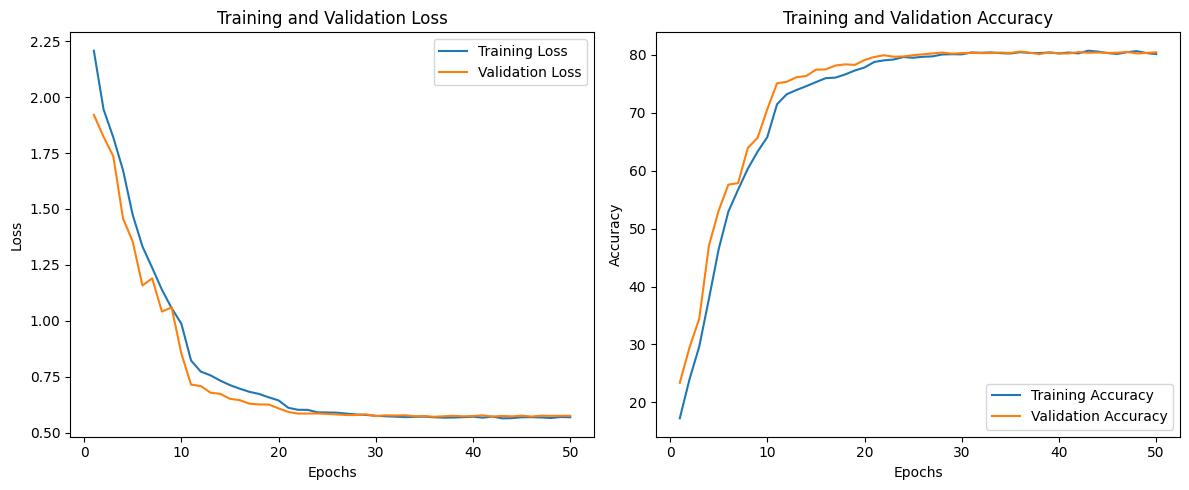

In [8]:
# Plot Training/Validation Loss and Accuracy
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_loss_history, label="Training Loss")
plt.plot(range(1, num_epochs+1), val_loss_history, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_acc_history, label="Training Accuracy")
plt.plot(range(1, num_epochs+1), val_acc_history, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.tight_layout()
plot_path = os.path.join(model_save_dir, "cvdl_hw2_q1_train_val_accuracy.png")
plt.savefig(plot_path)
plt.show()
